In [655]:
# Imports
import math
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.lines as mlines

In [656]:
# Pandas Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [657]:
# Import CSV
inital_slice = pd.read_csv('240112_150239_Slice1.csv')
middle_slice = pd.read_csv('240112_150239_Slice397.csv')
final_slice = pd.read_csv('240112_150239_Slice793.csv')

overall = pd.read_csv('240112_150239_averages.csv_Zone_Overall.csv')

In [658]:
# Merge Databases
#merged_slices = pd.merge(inital_slice, final_slice, how='outer')

In [659]:
# Clean Up Merged DF

# Tile position can be used for a visualtion in real space but is outside of the scope for this project
#merged_df = merged_df.drop(columns = ['TileX', 'TileZ'])

#merged_with_date = merged_df

#merged_df = merged_df.drop(columns = ['Age']) # Can drop for specific to remove dupes in certine cases, but age can be used for visulizations

#merged_df.drop_duplicates(inplace=True) # Takes df from 1430 rows to 109 (the removed data is duplicate "animals" with separate ages and tiles positions)

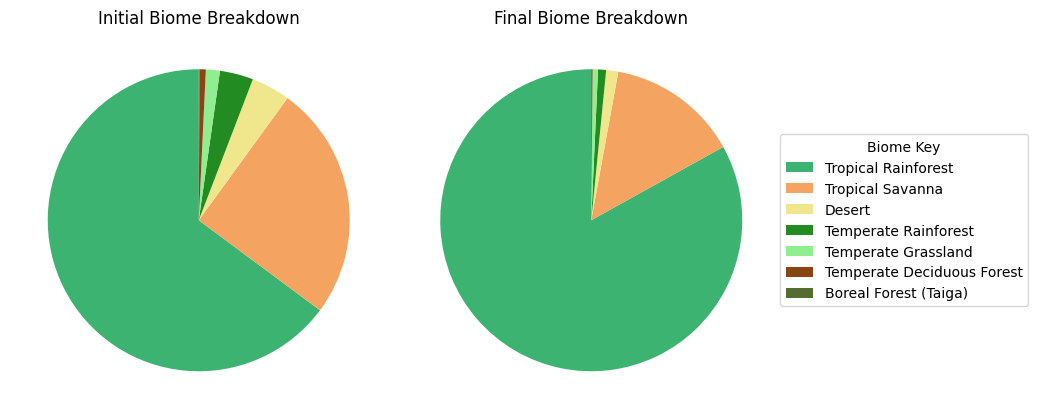

In [660]:
# Pie Chart Visualization for biomes

intial_counts = inital_slice['Biome'].value_counts() # this is a dict
final_counts = final_slice['Biome'].value_counts() # this is a dict

labels = list(intial_counts.keys())

fig, axs = plt.subplots(1, 2, figsize=(8, 5))


colors = ['mediumseagreen','sandybrown', 'khaki', 'forestgreen', 'lightgreen', 'saddlebrown', 'darkolivegreen']

wedges, _ = axs[0].pie(
    intial_counts, startangle=90, colors=colors
)

axs[1].pie(final_counts, startangle=90, colors=colors)

axs[0].set_title('Initial Biome Breakdown')
axs[1].set_title('Final Biome Breakdown')

fig.legend(wedges, labels, title="Biome Key", loc="center right", bbox_to_anchor=(1, 0, 0.3, 1))


plt.tight_layout()
plt.show()

C:\Users\ianmh\AppData\Local\Temp\ipykernel_10108\515720579.py:11: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_slices = pd.merge(inital_slice, final_slice_1, how='outer')


Index(['Tropical Rainforest', 'Tropical Savanna', 'Temperate Rainforest',
       'Temperate Deciduous Forest', 'Temperate Grassland', 'Desert'],
      dtype='object', name='Biome')


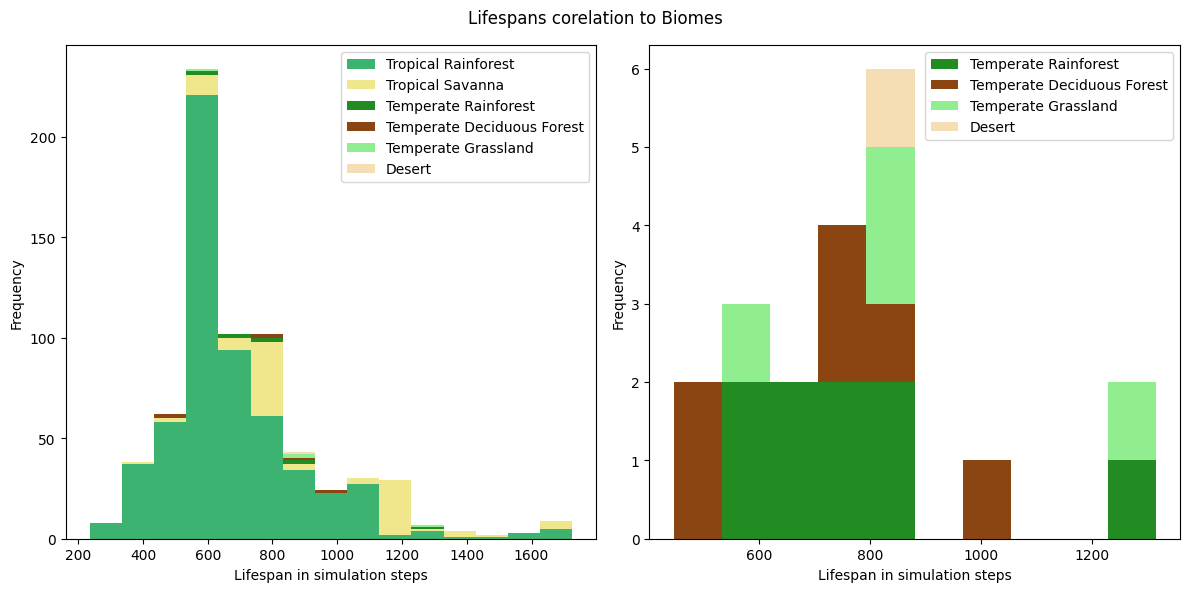

In [661]:
# graph 1

inital_slice_1 = inital_slice.copy()
final_slice_1 = final_slice.copy()

dropped_col = ['Avatar', 'TileX', 'TileZ']

inital_slice_1 = inital_slice_1.drop(columns=dropped_col)
final_slice_1 = final_slice_1.drop(columns=dropped_col)

merged_slices = pd.merge(inital_slice, final_slice_1, how='outer')

#print(len(merged_slices))

graph1 = merged_slices.copy()

graph1 = graph1[graph1['Lifespan'] != 1000]

pivoted_g1 = graph1.pivot(values='Lifespan', columns='Biome')

non_nan_counts = pivoted_g1.notna().sum()
sorted_columns = non_nan_counts.sort_values(ascending=False).index
pivoted_g1 = pivoted_g1[sorted_columns]

stacked_data = []

for col in pivoted_g1:
    stacked_data.append(pivoted_g1[col][pivoted_g1[col].notna()])

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

fig.suptitle('Lifespans corelation to Biomes')

plt.setp(axs[:2], xlabel='Lifespan in simulation steps')
plt.setp(axs[:2], ylabel='Frequency')

colors = ['mediumseagreen', 'khaki', 'forestgreen', 'saddlebrown', 'lightgreen', 'wheat']

axs[0].hist(stacked_data, stacked=True, bins=15, color=colors)
axs[0].legend(labels=pivoted_g1.columns, loc='upper right')

stacked_data_without_majority = stacked_data[2:]

axs[1].hist(stacked_data_without_majority, stacked=True, bins=10, color=colors[2:])
axs[1].legend(labels=pivoted_g1.columns[2:], loc='upper right')

print(pivoted_g1.columns)

plt.tight_layout()
plt.show()

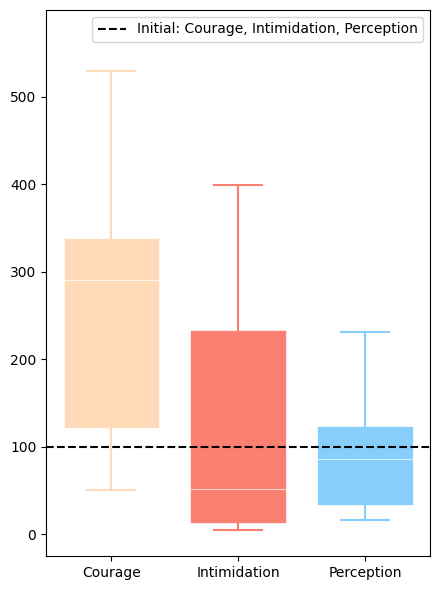

In [755]:
# Box plot

figs, ax = plt.subplots(figsize=(4.5, 6))

data = [inital_slice['Courage'], inital_slice['Intimidation'], inital_slice['Perception']]

data = [final_slice['Courage'], final_slice['Intimidation'], final_slice['Perception']]

inital_conditions = inital_slice['Courage']

plot = ax.boxplot(data, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"linewidth": 1.5},
                capprops={"linewidth": 1.5}, labels=['Courage', 'Intimidation', 'Perception'])

color = ['peachpuff', 'salmon', 'lightskyblue']

whisker_and_cap_colors = [x for x in color for _ in range(2)]

for patch, color in zip(plot['boxes'], color):
    patch.set_facecolor(color)

for index, whisker, in enumerate(plot['whiskers']):
    whisker.set(color=whisker_and_cap_colors[index], linewidth=1.5)
    plot['caps'][index].set(color=whisker_and_cap_colors[index], linewidth=1.5)

patch = ax.axline((1.25, 100), (6, 100), ls='--', color='black')

center_line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--', label='Initial: Courage, Intimidation, Perception')

plt.ylim(-25, 599)
plt.legend(handles=[center_line], loc='upper right')

plt.tight_layout()
plt.show()


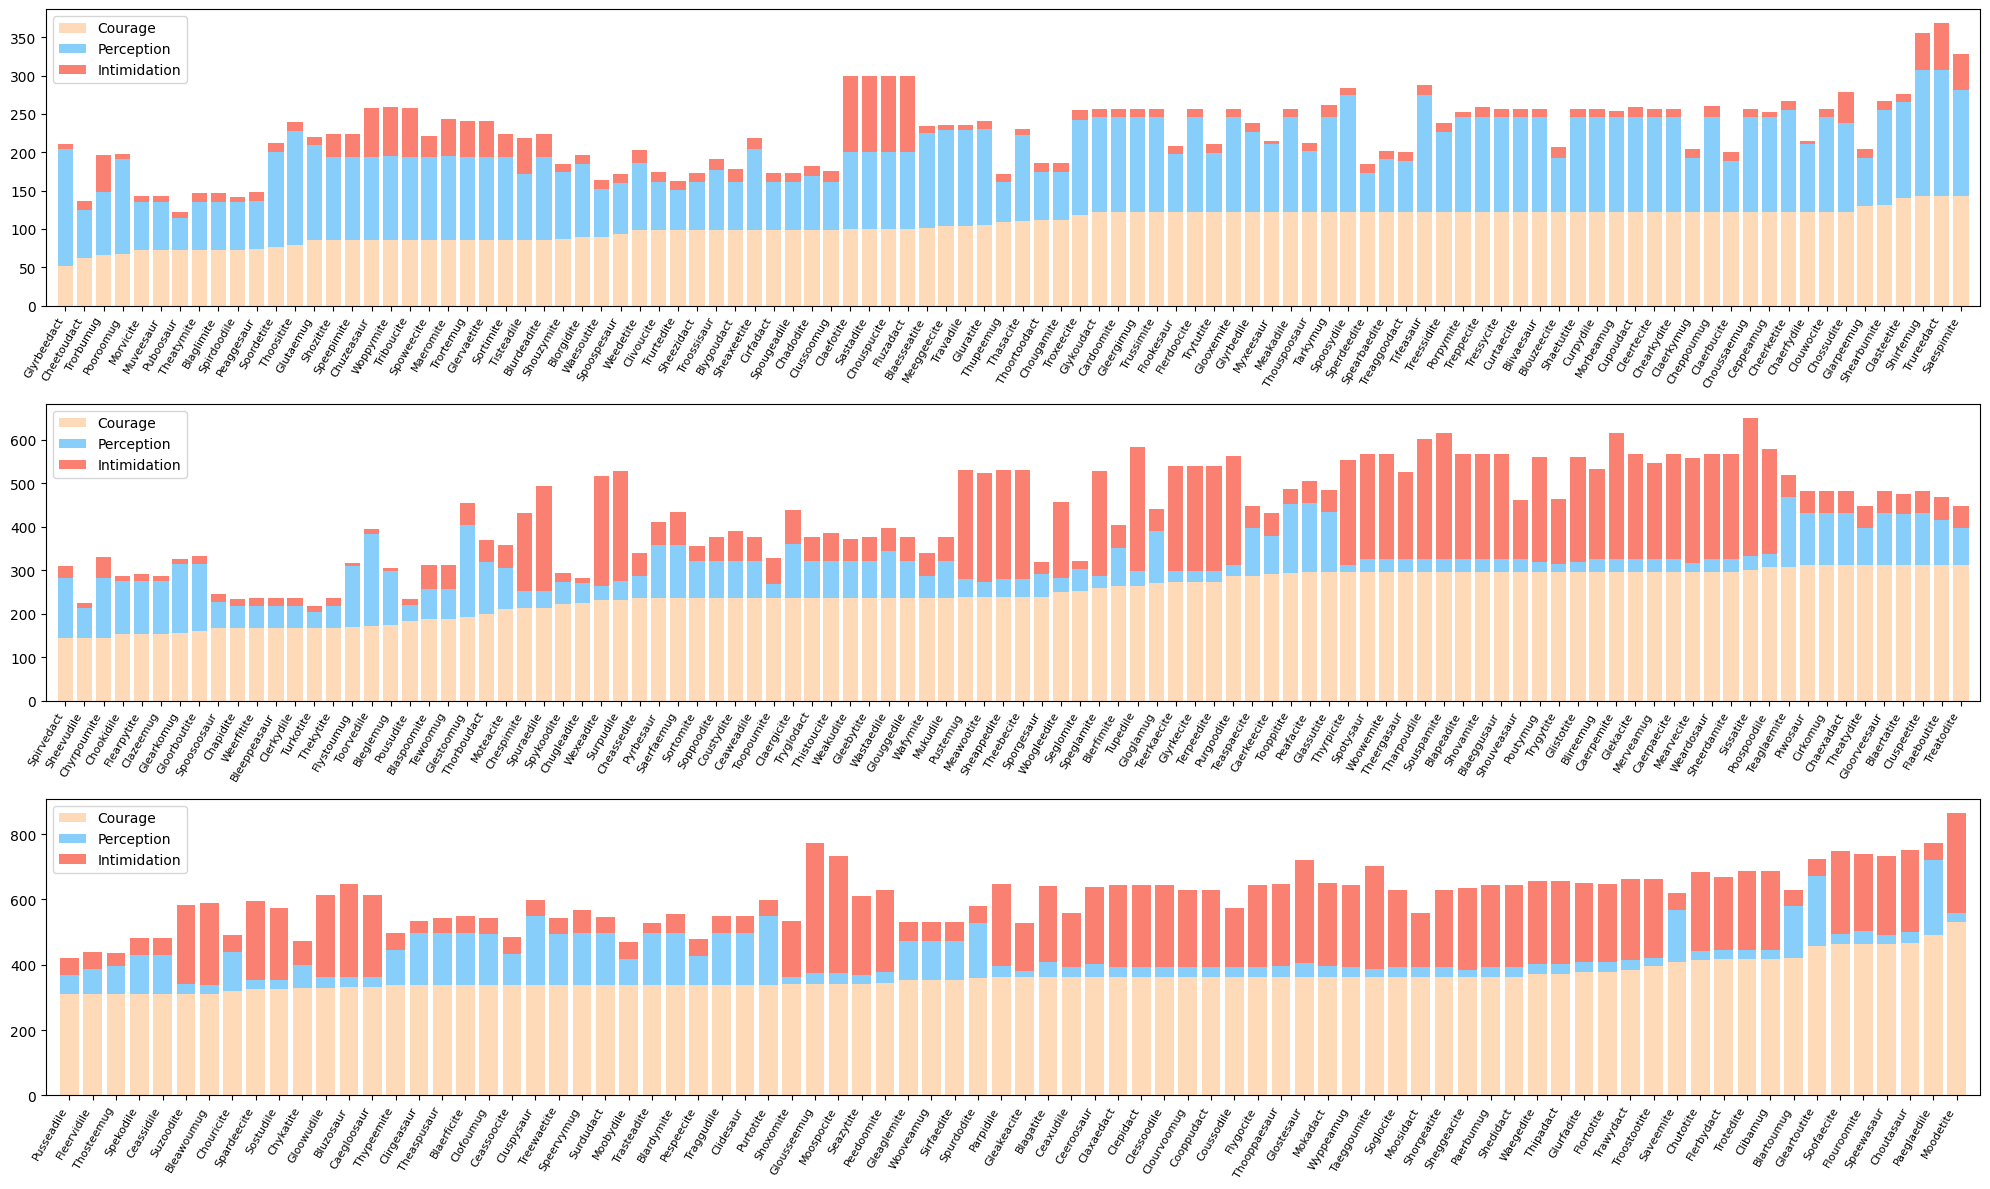

In [766]:
# Bar graph

bar_graph_data = merged_slices.copy()

bar_graph_data = bar_graph_data[['Creature name', 'Courage', 'Perception', 'Intimidation']]

bar_graph_data.drop_duplicates(inplace=True)

bar_graph_data.sort_values(by=['Courage'], inplace=True)

fig, axs = plt.subplots(3, 1, figsize=(20, 12))

color = ['peachpuff', 'salmon', 'lightskyblue']

x = bar_graph_data['Creature name']

axs[0].bar(x[:100], bar_graph_data['Courage'][:100], color=color[0])
axs[0].bar(x[:100], bar_graph_data['Perception'][:100], bottom=bar_graph_data['Courage'][:100], color=color[2])
axs[0].bar(x[:100], bar_graph_data['Intimidation'][:100], bottom=(bar_graph_data['Perception'][:100] + bar_graph_data['Courage'][:100]), color=color[1])

axs[0].set_xlim(-1, len(bar_graph_data[:100]))
axs[0].set_xticks(x[:100], labels=x[:100], rotation=60, ha='right', fontsize=8)

axs[0].legend(['Courage', 'Perception', 'Intimidation'], loc='upper left')

axs[1].bar(x[100:200], bar_graph_data['Courage'][100:200], color=color[0])
axs[1].bar(x[100:200], bar_graph_data['Perception'][100:200], bottom=bar_graph_data['Courage'][100:200], color=color[2])
axs[1].bar(x[100:200], bar_graph_data['Intimidation'][100:200], bottom=(bar_graph_data['Perception'][100:200] + bar_graph_data['Courage'][100:200]), color=color[1])

axs[1].set_xlim(-1, len(bar_graph_data[100:200]))
axs[1].set_xticks(x[100:200], labels=x[100:200], rotation=60, ha='right', fontsize=8)

axs[1].legend(['Courage', 'Perception', 'Intimidation'], loc='upper left')

axs[2].bar(x[200:], bar_graph_data['Courage'][200:], color=color[0])
axs[2].bar(x[200:], bar_graph_data['Perception'][200:], bottom=bar_graph_data['Courage'][200:], color=color[2])
axs[2].bar(x[200:], bar_graph_data['Intimidation'][200:], bottom=(bar_graph_data['Perception'][200:] + bar_graph_data['Courage'][200:]), color=color[1])

axs[2].set_xlim(-1, len(bar_graph_data[200:]))
axs[2].set_xticks(x[200:], labels=x[200:], rotation=60, ha='right', fontsize=8)

axs[2].legend(['Courage', 'Perception', 'Intimidation'], loc='upper left')

plt.tight_layout()
plt.show()

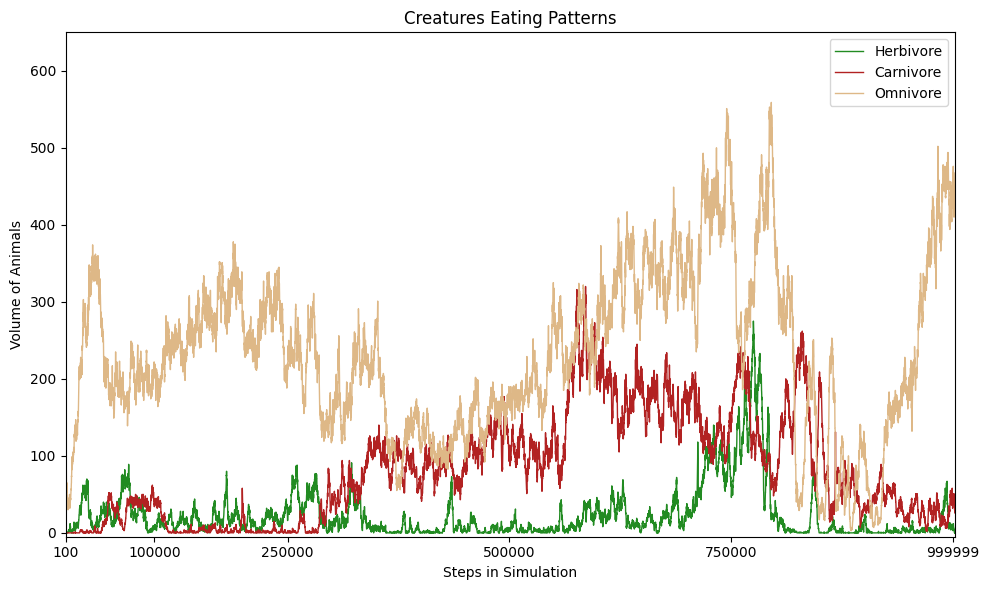

In [751]:
# Graph visualizing eating patterns over the epochs

graph_5_data = overall.copy()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(graph_5_data['Turn'], graph_5_data['Herbivores'], linewidth=1, color='forestgreen')
ax.plot(graph_5_data['Turn'], graph_5_data['Carnivores'], linewidth=1, color='firebrick')
ax.plot(graph_5_data['Turn'], graph_5_data['Omnivores'], linewidth=1, color='burlywood')

ax.set_title("Creatures Eating Patterns")
ax.set_ylabel('Volume of Animals')
ax.set_xlabel('Steps in Simulation')

ax.legend(['Herbivore', 'Carnivore', 'Omnivore'])

ax.set_ylim(-5, 650)
ax.set_xlim(0, 1_001_800)
ax.set_xticks([100, 100000, 250000, 500000, 750000, 999999])

plt.tight_layout()
plt.show()

